## Initialize

In [1]:
from StarKiller.initialization import starkiller_initialize
from StarKiller.interfaces import BurnType
from StarKiller.network import Network
from StarKiller.integration import NumericalJacobian

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
probin_file = "probin_burn_subch"
starkiller_initialize(probin_file)


Initialized StarKiller with ...
- EOS:     helmholtz
- Network: pynucastro


In [3]:
net = Network()
numerical_jac = NumericalJacobian()

## Set Test Inputs

In [4]:
burn_state = BurnType()
burn_state.state.rho = 1.0e9
burn_state.state.t = 1.0e9

massfrac = np.ones(net.nspec)/float(net.nspec)
burn_state.state.xn = massfrac

## Evaluate analytic jacobian

In [5]:
net.jacobian(burn_state)

# convert from Y to X
burn_state.jac = net.jac_to_x(burn_state.jac)

## Evaluate numerical jacobian

In [6]:
burn_state_numerical = burn_state.copy()

numerical_jac.jacobian(burn_state_numerical)

## Jacobian plotting function

In [7]:
def plot_jacobian(Jac, vmin=-99999999, vmax=-99999999):
    n = net.nspec + 2
    jac_mask = np.full((n,n), True, dtype=bool)
    jac_abs = np.absolute(Jac)
    for i in range(n):
        for j in range(n):
            if jac_abs[i,j] > 0.0:
                jac_abs[i,j] = np.log10(jac_abs[i,j])
                jac_mask[i,j] = False
    if vmin == -99999999:
        vmin = np.amin(jac_abs)
    if vmax == -99999999:
        vmax = np.amax(jac_abs)
    sns.heatmap(jac_abs, vmin=vmin, vmax=vmax, mask=jac_mask, cmap='viridis')
    return vmin, vmax

## Plot analytic Jacobian

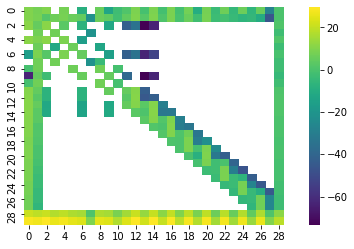

In [8]:
amin, amax = plot_jacobian(burn_state.jac)

## Plot numerical Jacobian

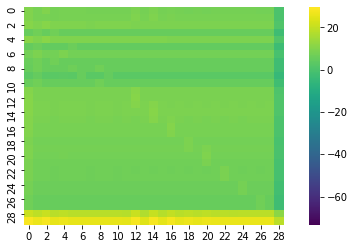

In [9]:
_ = plot_jacobian(burn_state_numerical.jac, vmin=amin, vmax=amax)

## Plot Analytic - Numerical Jacobian difference

<ipython-input-10-2b371a19290b>:1: RuntimeWarning: invalid value encountered in true_divide
  J_diff = (burn_state.jac - burn_state_numerical.jac)/burn_state_numerical.jac


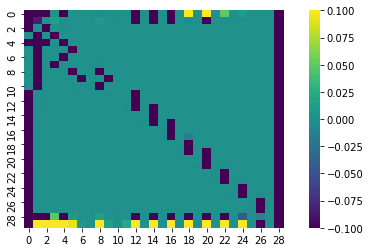

In [10]:
J_diff = (burn_state.jac - burn_state_numerical.jac)/burn_state_numerical.jac
_ = plot_jacobian(J_diff)